In [1]:
#Importing the libraries
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the file
df = pd.read_csv("/content/drive/My Drive/Graph_Neural_Networks/seealsology-data.tsv", sep = "\t")
df.head()

,source,target,depth
0,space research,advances in space research,1
1,space research,benefits of space exploration,1
2,space research,committee on space research,1
3,space research,deep space exploration,1
4,space research,lists of space programs,1


In [3]:
#Constructing the graph
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [4]:
len(G)

460

In [5]:
#random walk
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [6]:
get_randomwalk('space exploration', 10)

['space exploration',
 'in-space propulsion technologies',
 'orbital mechanics',
 'space science',
 'remote sensing']

In [7]:
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))
        
# count of sequences
len(random_walks)

100%|██████████| 460/460 [00:00<00:00, 11228.23it/s]


2300

In [8]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [9]:
#Deepwalk
# train skip-gram (word2vec) model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(154254, 213560)

In [10]:
model.similar_by_word('space tourism')

[('space flight participant', 0.9367335438728333),
 ('private spaceflight', 0.8695685267448425),
 ('pilot certification in the united states', 0.8598122596740723),
 ('space adventures', 0.8492832779884338),
 ('planetary surface construction', 0.8257327675819397),
 ('space architecture', 0.8196397423744202),
 ('shackleton energy company', 0.8188965320587158),
 ('commercial astronaut', 0.8147873282432556),
 ('commercialization of space', 0.811168909072876),
 ('spome', 0.7954761981964111)]

In [24]:
#plotting the embeddings in the 2d space
terms = ['lunar escape systems', 'soyuz 7k-l1', 
         'moon landing','space food', 'food systems on space exploration missions', 
         'space law', 'metalaw', 'moon treaty', 
          'reduced-gravity aircraft', 
          ]

In [12]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

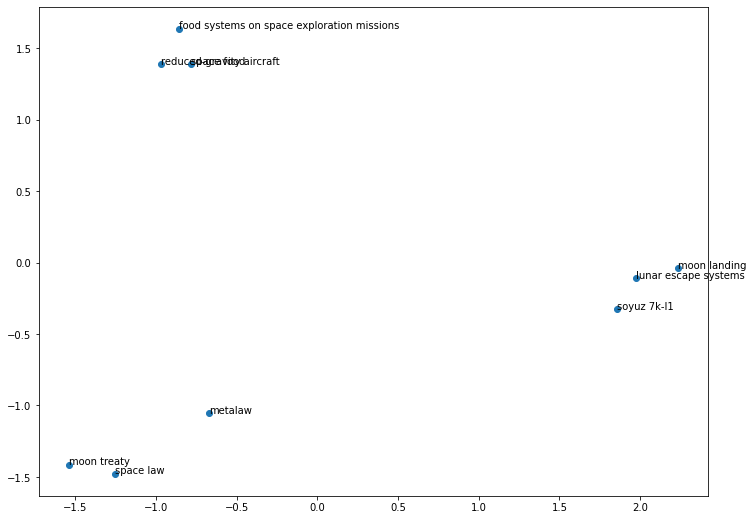

In [25]:
plot_nodes(terms)